In [96]:
#import pandas
import pandas as pd
col_names =  ['gmat','gpa', 'work_experience', 'admitted']

#load dataset
cand = pd.read_csv("candidates.csv", header=None, names=col_names)
cand.head(5)

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [97]:
feature_cols = ['gmat', 'gpa', 'work_experience','admitted']
X = cand[feature_cols] #features
y = cand['admitted'] #target variable

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=16)

In [99]:
from sklearn.linear_model import LogisticRegression

#instantiate model using default params
logreg = LogisticRegression(random_state=16, max_iter=1000) #code gives error w/o max iteration set
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [100]:
from sklearn import metrics

#confusion matrix initialization
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) #this is admission as we're finding people who got admitted
cnf_matrix

array([[7, 0],
       [0, 3]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted')

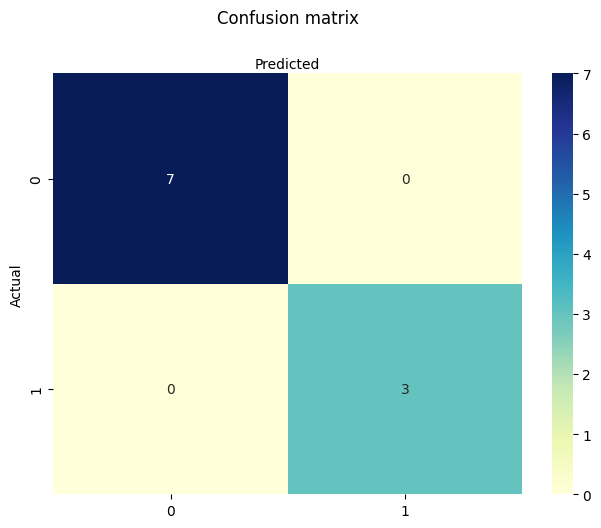

In [101]:

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')



In [102]:
from sklearn.metrics import classification_report
target_names = ['Admitted', 'Not Admitted']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Admitted       1.00      1.00      1.00         7
Not Admitted       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [104]:
exercise_data = {
    'gmat': [590, 740, 680, 610, 710],
    'gpa': [2.0, 3.7, 3.3, 2.3, 3.0],
    'work_experience':[3, 4, 6, 1, 5]}

#dataframe creation
exercise = pd.DataFrame(exercise_data)
exercise.index = ['Candidate 1', 'Candidate 2', 'Candidate 3', 'Candidate 4', 'Candidate 5']

#predict 
p = logreg.predict(exercise)
exercise['admitted'] = p




print(exercise)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- admitted


In [ ]:
#just incase i need to use ROC curve

#y_pred_proba = logreg.predict_proba(X_test)[::,1]
#fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#auc = metrics.roc_auc_score(y_test, y_pred_proba)
#plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#plt.legend(loc=4)
#plt.show()